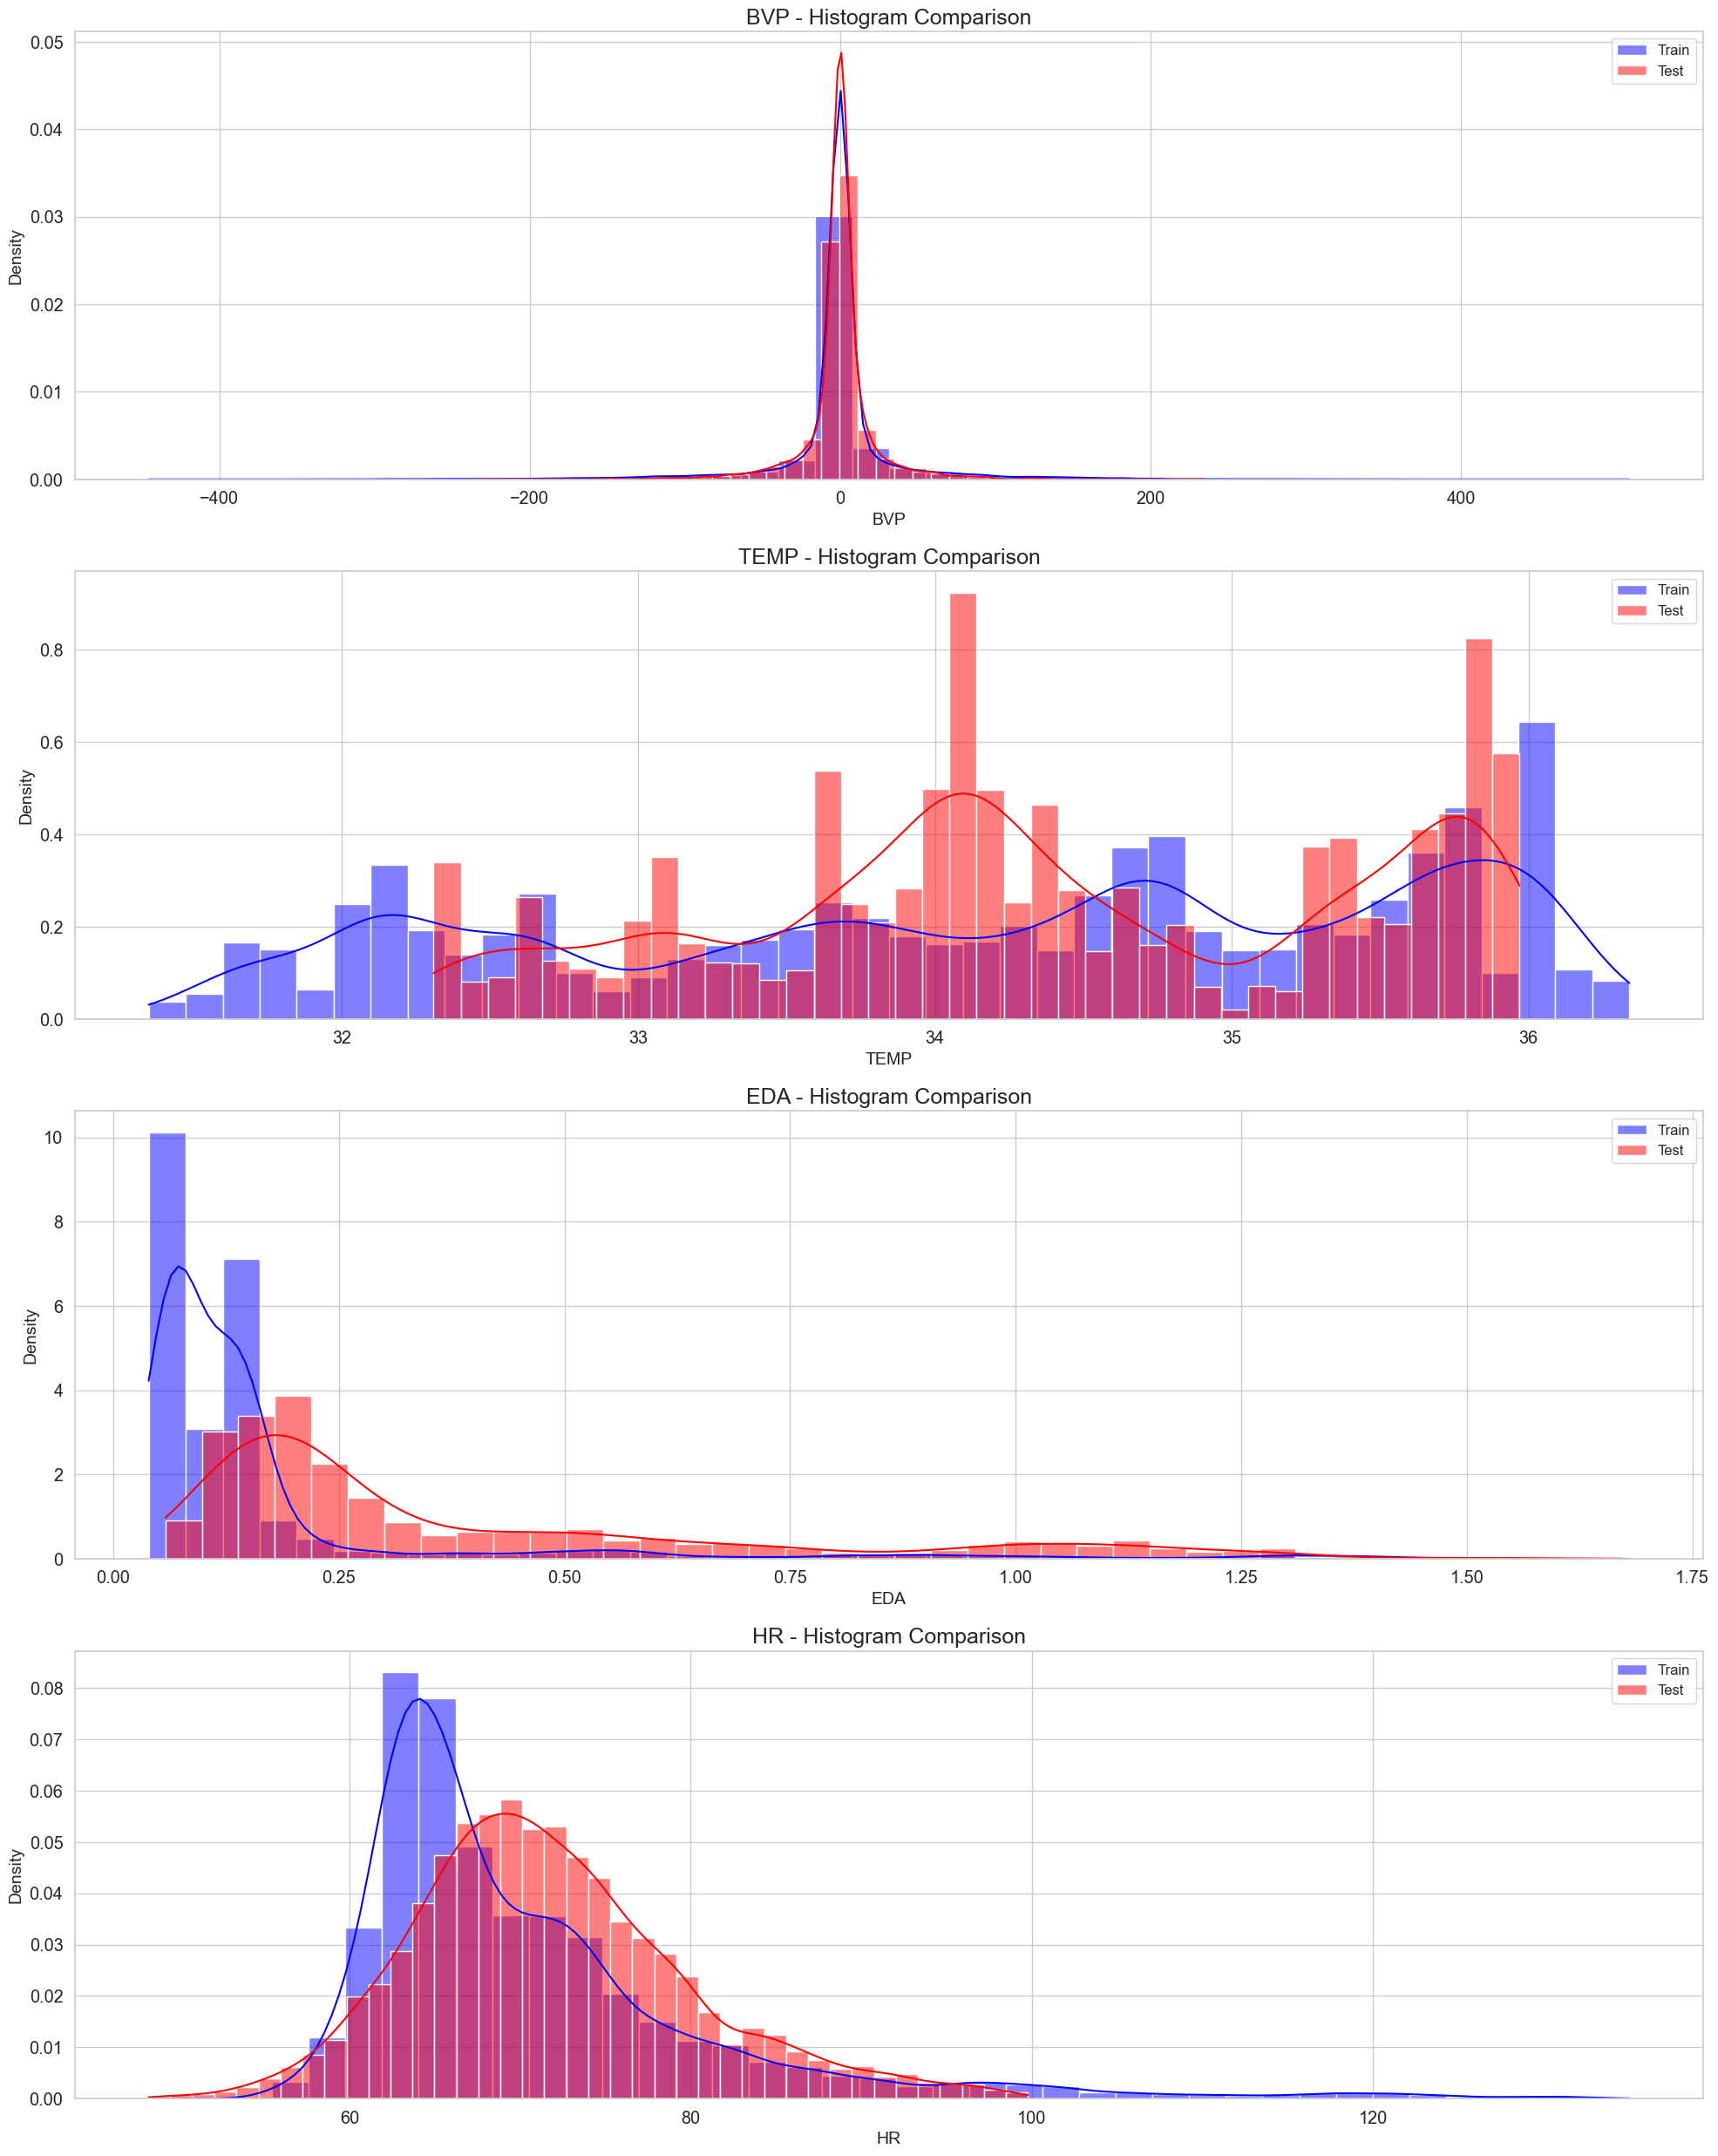

In [ ]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df_train = pd.read_csv("SQI.csv")
df_test = pd.read_csv("../data/test2.csv")

# --- Standardize column names ---
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

# --- Features to compare (ignore Sleep_Stage) ---
feature_map = {
    'bvp': 'bvp',
    'temp': 'temp_wrist',
    'eda': 'eda_wrist',
    'hr': 'hr'
}

# --- Filter subject (example: S002) ---
subject_id = 'S002'
df_train_sub = df_train[df_train['subject'] == subject_id].copy()
df_test_sub = df_test[df_test['subject'] == "S2"].copy()

# --- Extract features using mapping ---
df_train_features = df_train_sub[list(feature_map.keys())].copy()   # keys for train
df_test_features  = df_test_sub[list(feature_map.values())].copy()  # values for test

# Rename test columns to match train columns for plotting
df_test_features.columns = df_train_features.columns

# --- Plot histogram comparisons ---
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(20, 25))  # Large figure for visibility

for i, feat in enumerate(df_train_features.columns):
    plt.subplot(len(df_train_features.columns), 1, i+1)
    sns.histplot(df_train_features[feat], color='blue', label='Train', kde=True, stat='density', bins=40)
    sns.histplot(df_test_features[feat], color='red', label='Test', kde=True, stat='density', bins=40, alpha=0.5)
    plt.title(f"{feat.upper()} - Histogram Comparison", fontsize=18)
    plt.xlabel(feat.upper(), fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [2]:
from scipy.stats import wasserstein_distance
import pandas as pd

# --- Impute missing values in test set with column mean ---
df_test_features = df_test_features.fillna(df_test_features.mean())

# --- Compute numerical divergence table ---
divergence_data = []

for feat in df_train_features.columns:
    train_vals = df_train_features[feat].values
    test_vals = df_test_features[feat].values
    
    mean_train = train_vals.mean()
    mean_test  = test_vals.mean()
    std_train  = train_vals.std()
    std_test   = test_vals.std()
    
    mean_diff = mean_test - mean_train
    std_ratio = std_test / std_train if std_train != 0 else float('nan')
    wass_dist = wasserstein_distance(train_vals, test_vals)
    
    divergence_data.append({
        'Feature': feat,
        'Mean_Train': mean_train,
        'Mean_Test': mean_test,
        'Mean_Diff': mean_diff,
        'Std_Train': std_train,
        'Std_Test': std_test,
        'Std_Ratio': std_ratio,
        'Wasserstein_Distance': wass_dist
    })

df_divergence = pd.DataFrame(divergence_data)

# --- Display table ---
pd.set_option('display.float_format', lambda x: f'{x:0.4f}')
print(df_divergence)


  Feature  Mean_Train  Mean_Test  Mean_Diff  Std_Train  Std_Test  Std_Ratio  \
0     bvp      0.0031    -0.0004    -0.0036    42.0497   23.8702     0.5677   
1    temp     34.1724    34.3869     0.2145     1.3927    1.0453     0.7506   
2     eda      0.1682     0.3917     0.2236     0.2263    0.3289     1.4533   
3      hr     70.5959    71.7506     1.1547    10.9404    8.1075     0.7411   

   Wasserstein_Distance  
0                6.6213  
1                0.3415  
2                0.2238  
3                3.0246  
